Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27152\2329115648.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
448/448 [==============================] - 699s 2s/step - loss: 1.8014 - accuracy: 0.2603 - val_loss: 1.7016 - val_accuracy: 0.3380
Epoch 2/50
448/448 [==============================] - 236s 526ms/step - loss: 1.6273 - accuracy: 0.3685 - val_loss: 1.5417 - val_accuracy: 0.4142
Epoch 3/50
448/448 [==============================] - 301s 672ms/step - loss: 1.5261 - accuracy: 0.4099 - val_loss: 1.4619 - val_accuracy: 0.4411
Epoch 4/50
448/448 [==============================] - 653s 1s/step - loss: 1.4570 - accuracy: 0.4442 - val_loss: 1.4012 - val_accuracy: 0.4745
Epoch 5/50
448/448 [==============================] - 414s 924ms/step - loss: 1.3990 - accuracy: 0.4654 - val_loss: 1.3423 - val_accuracy: 0.4904
Epoch 6/50
448/448 [==============================] - 414s 926ms/step - loss: 1.3446 - accuracy: 0.4905 - val_loss: 1.3052 - val_accuracy: 0.5054
Epoch 7/50
448/448 [==============================] - 486s 1s/step - loss: 1.2998 - accuracy: 0.5117 - val_loss: 1.2809 - val_accu

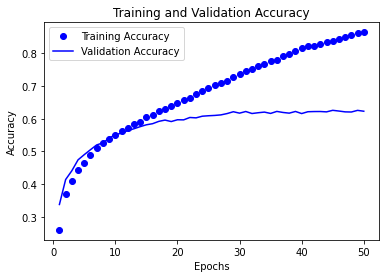

In [1]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        "D:/data/train",
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        "D:/data/test",
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)
import tensorflow as tf

# Define the learning rate schedule
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

# Use the learning rate schedule in the Adam optimizer
optimizer = Adam(learning_rate=lr_schedule)
# Compile the model with the updated optimizer
emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

# save model structure in jason file
model_json = emotion_model.to_json()
with open("D:/Emotion_detection_with_CNN-main/model/emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights("D:/Emotion_detection_with_CNN-main/model/emotion_model.h5")

import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy values from the training history
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']

# Plot the accuracy graph
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()